A project in Python that demonstrates how to AB test with a Z score, use data visuals, and graphs. The data uses purchasing and marketing data and measures the relationship between light and dark theme apps to the proportion of purchases online.

In [ ]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Drive02/ab_data.csv')

In [ ]:
data.describe()

,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Session_Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.256048,0.253312,0.505758,50.319494,41.528000,924.999000
std,0.139265,0.139092,0.172195,16.895269,14.114334,508.231723
min,0.010767,0.010881,0.200720,20.011738,18.000000,38.000000
25%,0.140794,0.131564,0.353609,35.655167,29.000000,466.500000
50%,0.253715,0.252823,0.514049,51.130712,42.000000,931.000000
75%,0.370674,0.373040,0.648557,64.666258,54.000000,1375.250000
max,0.499989,0.498916,0.799658,79.997108,65.000000,1797.000000


In [ ]:
data.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


In [ ]:
data.tail()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
995,Dark Theme,0.282792,0.401605,0.200720,68.478822,25,Kolkata,321,Yes,Yes
996,Dark Theme,0.299917,0.026372,0.762641,73.019821,38,Chennai,1635,Yes,Yes
997,Light Theme,0.370254,0.019838,0.607136,33.963298,32,Bangalore,1237,No,Yes
998,Light Theme,0.095815,0.137953,0.458898,37.429284,24,Chennai,893,Yes,No
999,Dark Theme,0.342588,0.061315,0.452410,31.613326,33,Chennai,129,Yes,Yes


In [ ]:
data.info

<bound method DataFrame.info of            Theme  Click Through Rate  Conversion Rate  Bounce Rate  \
0    Light Theme            0.054920         0.282367     0.405085   
1    Light Theme            0.113932         0.032973     0.732759   
2     Dark Theme            0.323352         0.178763     0.296543   
3    Light Theme            0.485836         0.325225     0.245001   
4    Light Theme            0.034783         0.196766     0.765100   
..           ...                 ...              ...          ...   
995   Dark Theme            0.282792         0.401605     0.200720   
996   Dark Theme            0.299917         0.026372     0.762641   
997  Light Theme            0.370254         0.019838     0.607136   
998  Light Theme            0.095815         0.137953     0.458898   
999   Dark Theme            0.342588         0.061315     0.452410   

     Scroll_Depth  Age   Location  Session_Duration Purchases Added_to_Cart  
0       72.489458   25    Chennai              15

In [ ]:
data.dtypes

Theme                  object
Click Through Rate    float64
Conversion Rate       float64
Bounce Rate           float64
Scroll_Depth          float64
Age                     int64
Location               object
Session_Duration        int64
Purchases              object
Added_to_Cart          object
dtype: object

In [ ]:
data.isnull().sum()

Theme                 0
Click Through Rate    0
Conversion Rate       0
Bounce Rate           0
Scroll_Depth          0
Age                   0
Location              0
Session_Duration      0
Purchases             0
Added_to_Cart         0
dtype: int64

In [ ]:
corr = data.corr()

<ipython-input-144-17182710d970>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

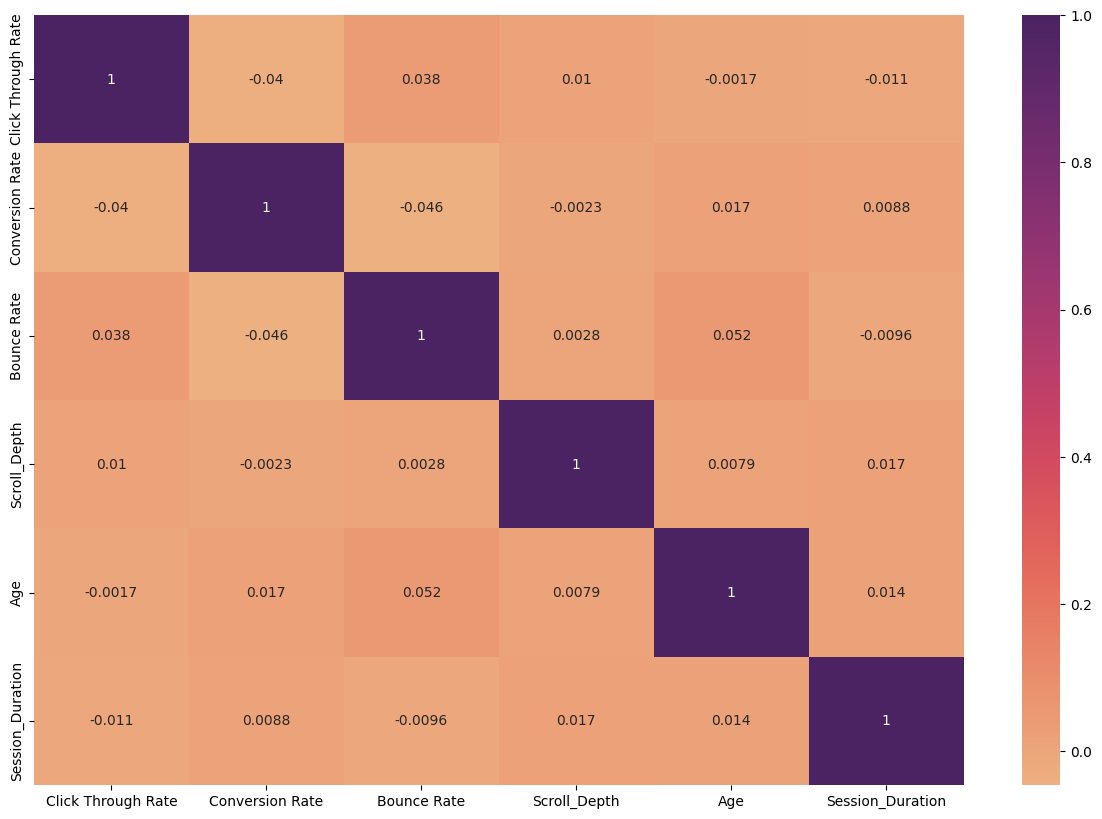

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap = 'flare')

(array([22., 14., 21., 22., 22., 22., 14., 22., 23., 14., 19., 21., 22.,
        16., 22., 20., 20., 25., 26., 26., 18., 20., 24., 15., 16., 10.,
        18., 22., 22., 23., 20., 18., 26., 17., 19., 17., 27., 19., 19.,
        33., 25., 16., 21., 22., 13., 13., 22., 16., 20., 16.]),
 array([0.01088097, 0.02064167, 0.03040236, 0.04016306, 0.04992375,
        0.05968445, 0.06944514, 0.07920583, 0.08896653, 0.09872722,
        0.10848792, 0.11824861, 0.12800931, 0.13777   , 0.14753069,
        0.15729139, 0.16705208, 0.17681278, 0.18657347, 0.19633417,
        0.20609486, 0.21585555, 0.22561625, 0.23537694, 0.24513764,
        0.25489833, 0.26465902, 0.27441972, 0.28418041, 0.29394111,
        0.3037018 , 0.3134625 , 0.32322319, 0.33298388, 0.34274458,
        0.35250527, 0.36226597, 0.37202666, 0.38178736, 0.39154805,
        0.40130874, 0.41106944, 0.42083013, 0.43059083, 0.44035152,
        0.45011222, 0.45987291, 0.4696336 , 0.4793943 , 0.48915499,
        0.49891569]),
 <BarContainer

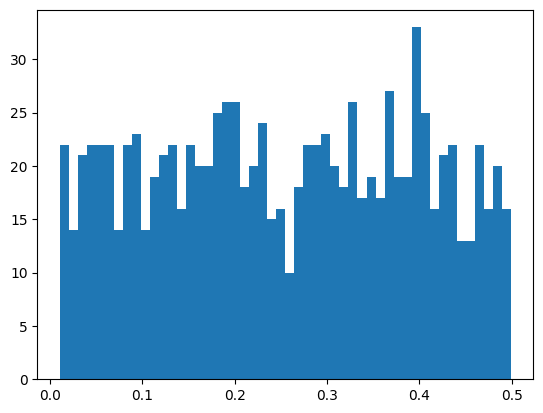

In [ ]:
plt.hist(data['Conversion Rate'], bins= 50)

(array([10., 20., 22., 19., 20., 19., 30., 25., 13., 17., 14., 26.,  8.,
        19., 24., 21., 20., 16., 28., 20., 22., 26., 28., 26.,  9., 23.,
        18., 19., 23., 23., 22., 19., 27., 23., 16., 24., 14., 18., 25.,
        17., 12., 17.,  9., 22., 18., 21., 15., 27., 18., 28.]),
 array([0.01076652, 0.02055097, 0.03033541, 0.04011985, 0.04990429,
        0.05968873, 0.06947317, 0.07925761, 0.08904205, 0.09882649,
        0.10861093, 0.11839537, 0.12817981, 0.13796425, 0.14774869,
        0.15753313, 0.16731757, 0.17710201, 0.18688645, 0.19667089,
        0.20645533, 0.21623977, 0.22602421, 0.23580865, 0.24559309,
        0.25537753, 0.26516197, 0.27494642, 0.28473086, 0.2945153 ,
        0.30429974, 0.31408418, 0.32386862, 0.33365306, 0.3434375 ,
        0.35322194, 0.36300638, 0.37279082, 0.38257526, 0.3923597 ,
        0.40214414, 0.41192858, 0.42171302, 0.43149746, 0.4412819 ,
        0.45106634, 0.46085078, 0.47063522, 0.48041966, 0.4902041 ,
        0.49998854]),
 <BarContainer

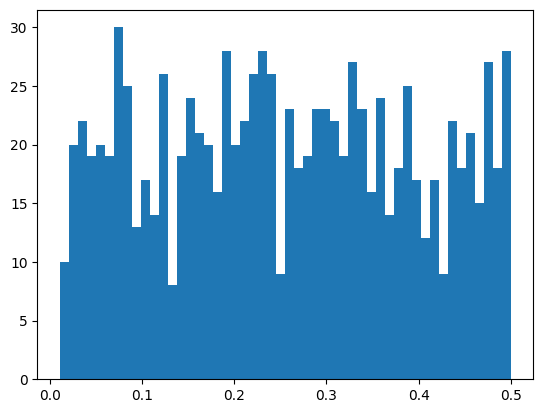

In [ ]:
plt.hist(data['Click Through Rate'], bins= 50)

(array([486.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 514.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

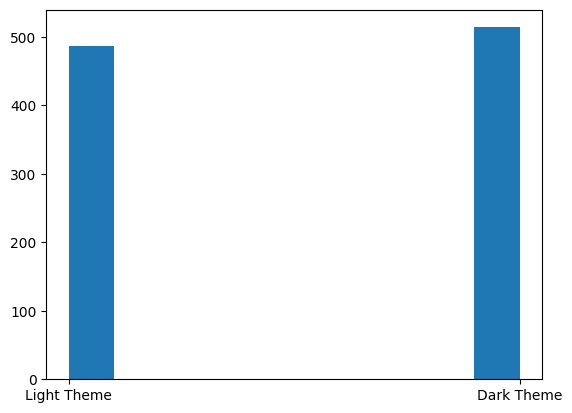

In [ ]:
plt.hist(data['Theme'])

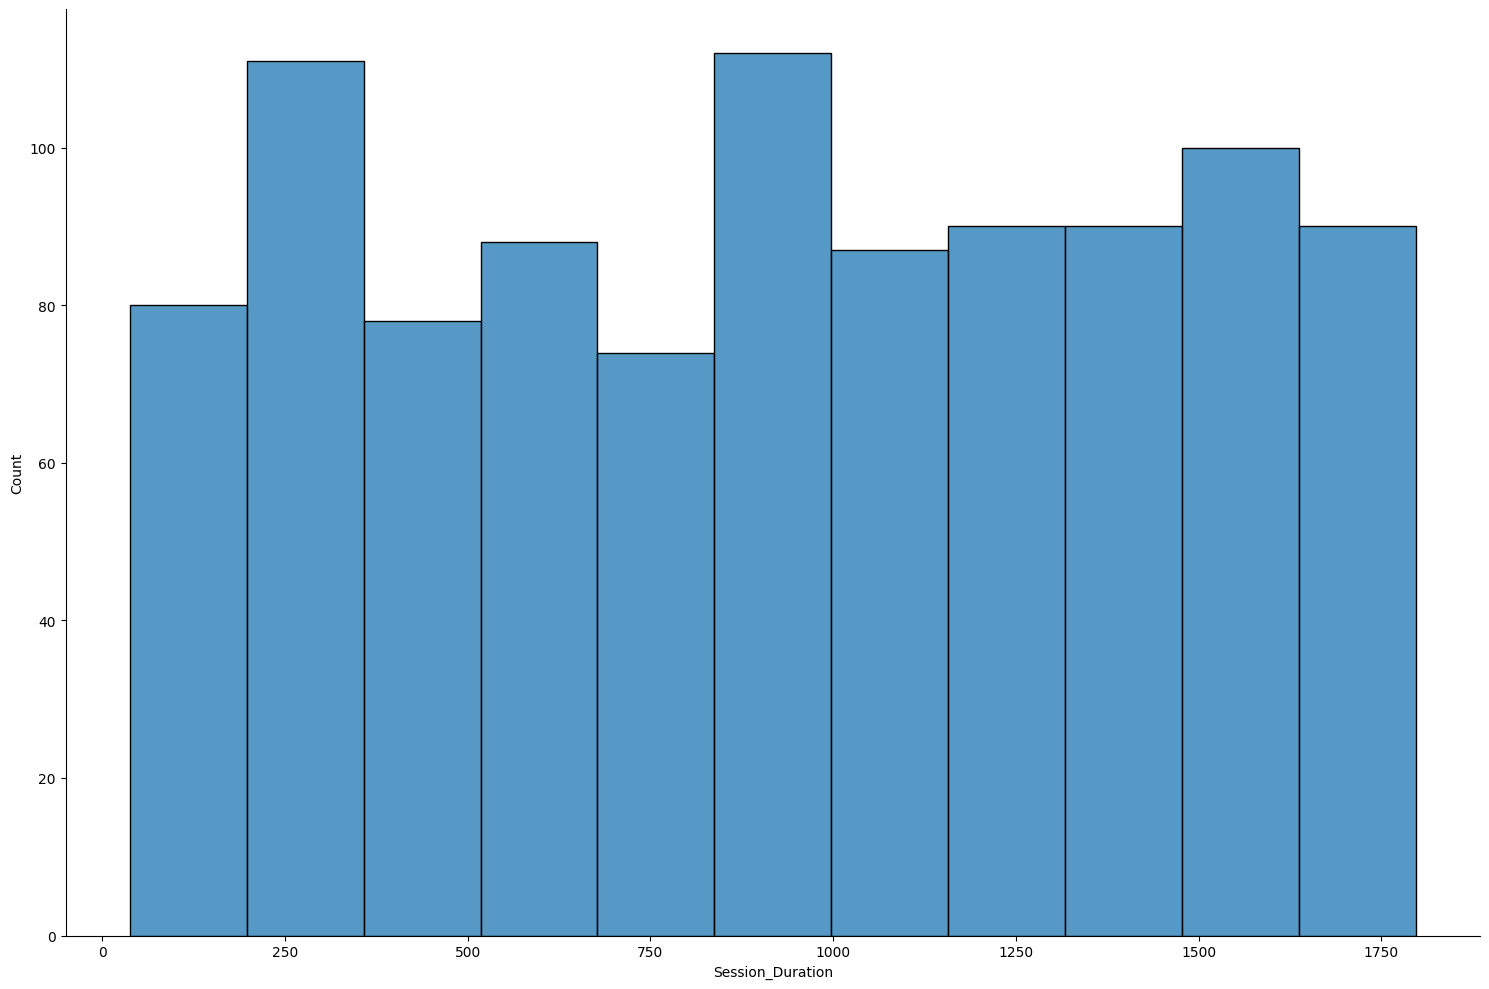

In [ ]:
sns.displot(data = data, x= 'Session_Duration', kind = 'hist', height = 10, aspect = 1.5)

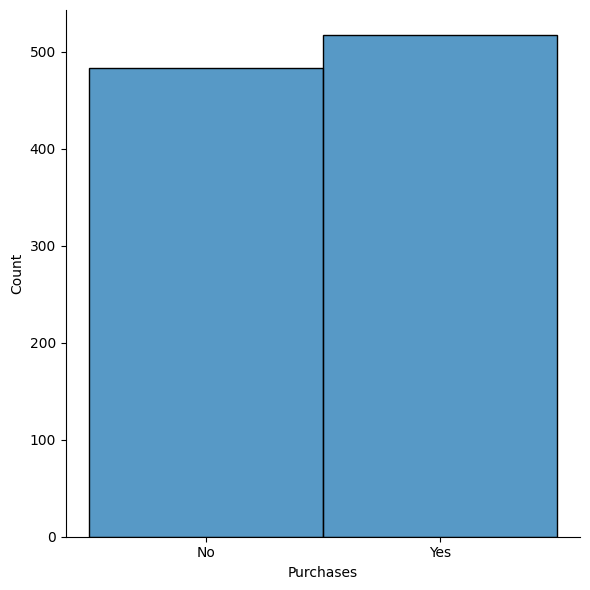

In [ ]:
sns.displot(data = data, x= 'Purchases', kind = 'hist', height = 6, aspect = 1, binwidth = .1)

In [ ]:
fig = px.scatter(data, x='Click Through Rate',
                 y='Conversion Rate', color='Theme',
                 title='Click Through vs Conversion', trendline='ols')
fig.show()

In [ ]:
light_theme = data[data['Theme'] == 'Light Theme']
dark_theme = data[data['Theme'] == 'Dark Theme']

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=light_theme['Conversion Rate'],
                     name='Light Theme'))
fig.add_trace(go.Box(y=dark_theme['Conversion Rate'],
                     name='Dark Theme'))

fig.update_layout(
    title_text='Conversion Rate by Theme',
    yaxis_title_text='Conversion Rate',
)

fig.show()

In [ ]:
#getting number of rows for light theme
light_conversions = light_theme[light_theme['Purchases'] == 'Yes'].shape[0]
light_total = light_theme_data.shape[0]

#getting number of rows for dark theme
dark_conversions = dark_theme[dark_theme['Purchases'] == 'Yes'].shape[0]
dark_total = dark_theme_data.shape[0]

conversion_counts = [light_conversions, dark_conversions]
sample_sizes = [light_theme_total, dark_theme_total]

light_conversion_rate = light_theme_conversions / light_theme_total
dark_conversion_rate = dark_theme_conversions / dark_theme_total


Performing the two-sample proportion test

In [ ]:
zstat, pval = proportions_ztest(conversion_counts, sample_sizes)

print('Converstion and A/B Test Results')
print("Light Theme Conversion Rate:", round(light_conversion_rate, 3))
print("Dark Theme Conversion Rate:", round(dark_conversion_rate, 3))
print("A/B Testing - Z-statistic:", round(zstat, 3), " P-value:", round(pval,3))

Converstion and A/B Test Results
Light Theme Conversion Rate: 0.531
Dark Theme Conversion Rate: 0.504
A/B Testing - Z-statistic: 0.853  P-value: 0.394
